# GPU performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N_bsv = [10000, 30000, 70000, 100000, 300000, 500000, 700000, 800000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, 12000000, 16000000, 18000000, 20000000, 22000000]
N_sc = [10000, 30000, 70000, 100000, 300000, 500000] #, 700000, 800000

N_bs=[100]
M_ests=[100, 200, 400]
m_sc = [60]

seeds = [1, 2, 3]

total_time_bsv = []
gpu_time_bsv = []
gflops_bsv = []
iter_bsv = []

for N_b in N_bs:
    total_time_bsv_N_b = []
    gpu_time_bsv_N_b = []
    gflops_bsv_N_b = []
    iter_bsv_N_b = []
    for M_est in M_ests:
        total_time_bsv_m = []
        gpu_time_bsv_m = []
        gflops_bsv_m = []
        iter_bsv_m = []
        for N in N_bsv:
            total_time_bsv_m_seed = []
            gpu_time_bsv_m_seed = []
            gflops_bsv_m_seed = []
            iter_bsv_m_seed = []
            for seed in seeds:
                try:
                    df = pd.read_csv(f'../log/GH200_single/logFile_numPointsTotal{N}_numBlocksTotal{int(N/N_b)}_m{M_est}_seed{seed}_isScaled1_GH200_single.csv')
                    total_time_bsv_m_seed.append(df['total'].iloc[0])
                    gpu_time_bsv_m_seed.append(df['computation'].iloc[0])
                    gflops_bsv_m_seed.append(df['total_gflops'].iloc[0])
                    iter_bsv_m_seed.append(df['iters'].iloc[0])
                except FileNotFoundError:
                    continue
            # print(len(total_time_bsv_m_seed))
            if len(total_time_bsv_m_seed) == 0 or np.isnan(np.mean(total_time_bsv_m_seed)):
                continue
            total_time_bsv_m.append(np.mean(total_time_bsv_m_seed))
            gpu_time_bsv_m.append(np.mean(gpu_time_bsv_m_seed))
            gflops_bsv_m.append(np.mean(gflops_bsv_m_seed))
            iter_bsv_m.append(np.mean(iter_bsv_m_seed))
        total_time_bsv_N_b.append(total_time_bsv_m) 
        gpu_time_bsv_N_b.append(gpu_time_bsv_m) 
        gflops_bsv_N_b.append(gflops_bsv_m) 
        iter_bsv_N_b.append(iter_bsv_m) 
    gpu_time_bsv.append(gpu_time_bsv_N_b)
    total_time_bsv.append(total_time_bsv_N_b) 
    gflops_bsv.append(gflops_bsv_N_b) 
    iter_bsv.append(iter_bsv_N_b) 
    

total_time_sc = []
gpu_time_sc = []
gflops_sc = []
iter_sc = []

for N in N_sc:
    time_sc_gpu_seed = []
    gflops_sc_seed = []
    time_sc_total_seed = []
    iter_sc_seed = []
    for seed in seeds:
        try:
            df = pd.read_csv(f'../log/GH200_single/logFile_numPointsTotal{N}_numBlocksTotal{N}_m60_seed{seed}_isScaled1_GH200_single.csv')
            
            time_sc_gpu_seed.append(df['computation'].iloc[0])
            gflops_sc_seed.append(df['total_gflops'].iloc[0])
            time_sc_total_seed.append(df['total'].iloc[0])
            iter_sc_seed.append(df['iters'].iloc[0])
        except FileNotFoundError:
            continue
    gpu_time_sc.append(np.mean(time_sc_gpu_seed))
    gflops_sc.append(np.mean(gflops_sc_seed))
    total_time_sc.append(np.mean(time_sc_total_seed))
    iter_sc.append(np.mean(iter_sc_seed))

## Single A100 80GB

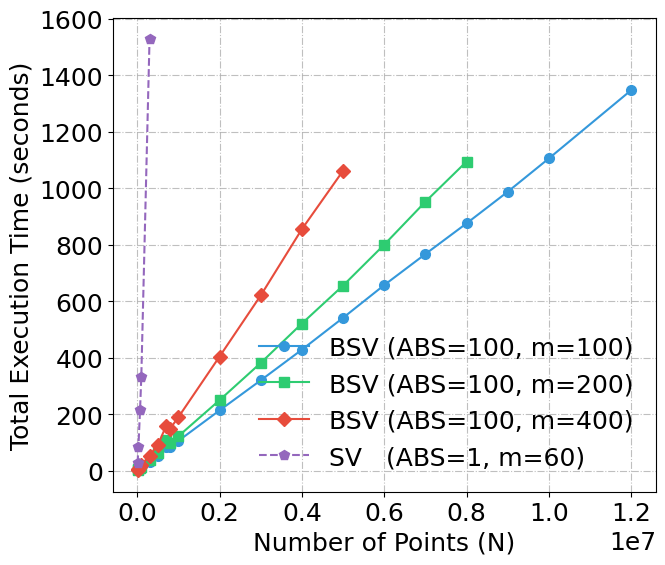

In [2]:
import matplotlib.pyplot as plt
import os

# Set default font size to 16
plt.rcParams.update({'font.size': 18})


plt.figure(figsize=(7, 6))
# Define different markers for each line
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '8']
colors = ['#3498db', '#2ecc71','#e74c3c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot BSV lines for different m values
for i, N_b in enumerate(N_bs):
    for j, M_est in enumerate(M_ests):
        plt.plot(N_bsv[:len(total_time_bsv[i][j])], np.asarray(total_time_bsv[i][j]), 
                 label=f'BSV (ABS={N_b}, m={M_est})', 
                 marker=markers[i*len(M_ests)+j],
                 color=colors[j],
                 markersize=7)

# Plot SC line
plt.plot(N_sc[:len(total_time_sc)-1], np.asarray(total_time_sc[:len(total_time_sc) - 1]), 
         label='SV   (ABS=1, m=60)', 
         marker=markers[7], 
         linestyle='--',
         color=colors[3],
         markersize=7)

plt.xlabel('Number of Points (N)')
plt.ylabel('Total Execution Time (seconds)')
# plt.title('Performance Comparison: BSV vs SV')
plt.grid(True, ls="-.", alpha=0.8)
plt.legend(framealpha=0.0)
# plt.xscale('log')  # Use log scale for x-axis due to large range
# plt.yscale('log')  # Use log scale for y-axis if times vary by orders of magnitude
plt.tight_layout()
os.makedirs('./fig', exist_ok=True)
plt.savefig('./fig/perf_total_time_bsv_vs_sv_GH200.pdf', bbox_inches='tight')
plt.show()

## GFLOPS

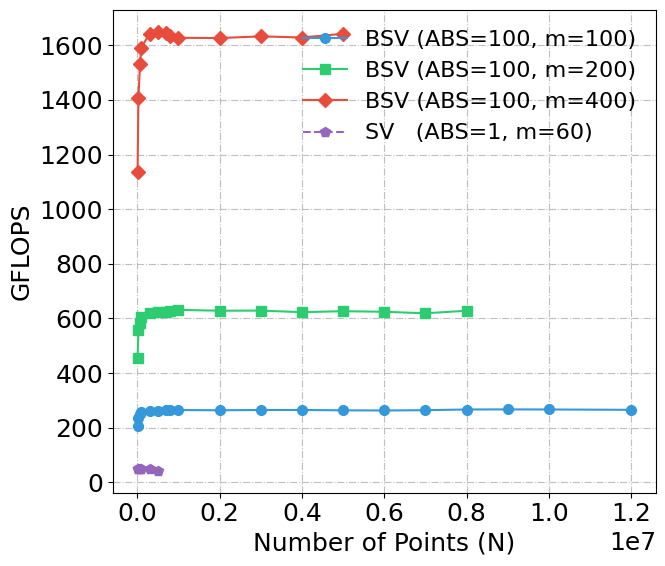

In [3]:
import matplotlib.pyplot as plt
import os

# Set default font size to 16
plt.rcParams.update({'font.size': 18})


plt.figure(figsize=(7, 6))
# Define different markers for each line
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '8']
colors = ['#3498db', '#2ecc71','#e74c3c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


# Plot BSV lines for different m values
for i, N_b in enumerate(N_bs):
    for j, M_est in enumerate(M_ests):
        plt.plot(N_bsv[:len(gpu_time_bsv[i][j])], np.array(gflops_bsv[i][j])/np.array(gpu_time_bsv[i][j])*500, 
                 label=f'BSV (ABS={N_b}, m={M_est})', 
                 marker=markers[i*len(M_ests)+j],
                 color=colors[j],
                 markersize=7)

# Plot SC line
plt.plot(N_sc, np.array(gflops_sc)/np.array(gpu_time_sc)*500, 
         label='SV   (ABS=1, m=60)', 
         marker=markers[7], 
         linestyle='--',
         color=colors[3],
         markersize=7)

plt.xlabel('Number of Points (N)')
plt.ylabel('GFLOPS')
# plt.title('Performance Comparison: BSV vs SV')
plt.grid(True, ls="-.", alpha=0.8)
plt.legend(framealpha=0.0, fontsize=16, loc='upper right')
# plt.ylim(-10, 1390)
# plt.xscale('log', base=2)  # Use log scale for x-axis due to large range
# plt.yscale('log')  # Use log scale for y-axis if times vary by orders of magnitude
plt.tight_layout()
os.makedirs('./fig', exist_ok=True)
plt.savefig('./fig/perf_GPU_bsv_vs_sv_gflops_GH200.pdf', bbox_inches='tight')
plt.show()

## Multi & Single Comparison

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set default font size to 16
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(7, 6))

# Plot all configurations
plt.plot(N_bsv[:len(time_bsv_single1)], time_bsv_single1, 'o-', 
         label='Single GPU', markersize=7)
plt.plot(N_bsv[:len(time_bsv_single2)], time_bsv_single2, 's-', 
         label='Single Node (2 GPUs)', markersize=7)
plt.plot(N_bsv[:len(time_bsv_single4)], time_bsv_single4, '^-', 
         label='Single Node (4 GPUs)', markersize=7)
plt.plot(N_bsv[:len(time_bsv_multi2)], time_bsv_multi2, 'D-', 
         label='Multi Node (2 GPUs)', markersize=7)
plt.plot(N_bsv[:len(time_bsv_multi4)], time_bsv_multi4, 'v-', 
         label='Multi Node (4 GPUs)', markersize=7)

plt.xlabel('Number of Points (N)')
plt.ylabel('GPU Execution Time (seconds)')
plt.grid(True, ls="-.", alpha=0.8)
plt.legend(framealpha=0.0)
# plt.xscale('log')  # Use log scale for x-axis due to large range
# plt.yscale('log')  # Use log scale for y-axis

plt.tight_layout()
plt.savefig('./fig/perf_GPU_all_configs.pdf')
plt.show()